## Name: Noha Magdy Ali
## ID: 1610126

# <center><font color=darkred>Assignment 2 </font>

# <font color=darkred size=4>1-Needed Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte,img_as_float
from skimage import data, io, filters
from matplotlib.pyplot import imshow, show, subplot, title, get_cmap
from skimage.exposure import rescale_intensity
from skimage.filters import laplace ,sobel, roberts
from scipy import ndimage
from scipy.fftpack import fft , fft2 ,fftshift , ifftshift , ifft2
from skimage.filters import gaussian
from skimage.morphology import disk
from math import floor

## Noisy Image Rendering:

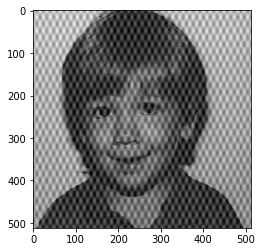

In [2]:
img = io.imread('boy_noisy.png')
plt.imshow(img,'gray',vmin=0, vmax=255 )
plt.show()

# Task 1:
     You will consider the effects of additive noise and the use of DFT to remove this kind of noise. Using frequency domain filtering, devise a procedure for removing the noise and show your results. For comparison purposes, remove the noise in the spatial domain by convolving the noisy image with Average filter (e.g., 7 x 7 and 15 x 15). Compare resulting images of both spatial and frequency domain filtering. Also, you can elaborate on differences in the jupyter notebook as a comment.

# <font color=darkred size=4>1-Solution 

### noise removing in frequency domain

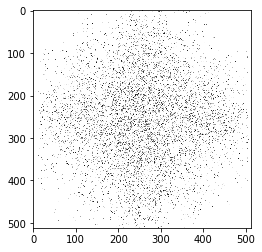

In [91]:
#image after fft

img_f=fft2(img)
imgFF=np.abs(img_f)
plt.imshow(imgFF,'gray',vmin=0, vmax=255 ) 

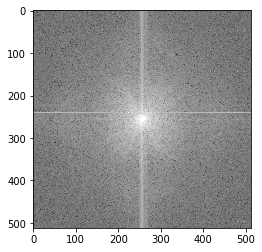

In [97]:
#image after shifted fft

imF2=fftshift(img_f)
imFF2=np.abs(imF2)   
Magnitude_spectrum = 20*np.log(imFF2)
plt.imshow(Magnitude_spectrum,'gray',vmin=0, vmax=255 )

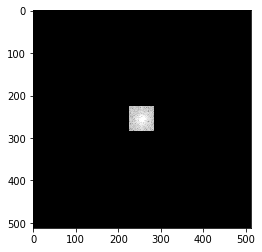

In [98]:
#shape of the desired part from frequency domain 
m=np.copy (Magnitude_spectrum)
m[0:225, 0:511]=0
m[0:511,0:225 ]=0
m[285:511, 0:511]=0
m[0:511, 285:511]=0
plt.imshow(m,'gray',vmin=0, vmax=255 )

In [3]:
#noise removing in frequency domain

def noise_remover(image):
    im=np.copy(image)
    imgF=fft2(im)
    i=fftshift(imgF)
    i[0:225, 0:511]=0
    i[0:511,0:225 ]=0
    i[288:511, 0:511]=0
    i[0:511, 288:511]=0
    x=np.real (ifft2(ifftshift(i)))+np.imag (ifft2(ifftshift(i)))
    return x
   

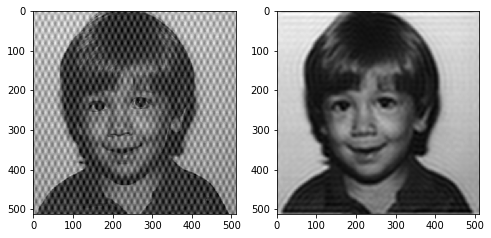

In [225]:
new= noise_remover(img)
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 8)
ax1.imshow(img ,cmap=plt.cm.gray)
ax2.imshow(new ,cmap=plt.cm.gray)
plt.show()

#### ------------------------------------------------------------------------------------------------------------

### Trying circular mask 

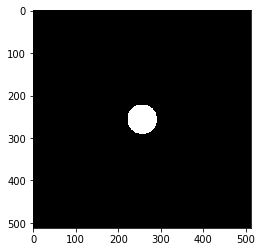

In [4]:
x= disk (35)

def padding (k):
    im= np.zeros((512,512))
    col=im.shape[1]//2
    raw=im.shape[0]//2
    if (k.shape[0])%2 == 0:
        im[raw-floor(k.shape[0]/2):raw+(floor(k.shape[0]/2)),col-floor(k.shape[1]/2):col+(floor(k.shape[1]/2))]=k
    else:
        im[raw-floor(k.shape[0]/2):raw+(floor(k.shape[0]/2)+1),col-floor(k.shape[1]/2):col+(floor(k.shape[1]/2)+1)]=k

    return im

circle= padding (x)
plt.imshow(circle,'gray',vmin=0, vmax=1)

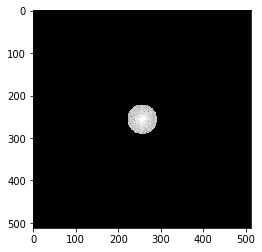

In [173]:
#shape of the desired part from frequency domain 

test = Magnitude_spectrum *circle
plt.imshow(test,'gray',vmin=0, vmax=255 )

In [5]:
def noise_remover2(image):
    im=np.copy(image)
    imgF=fft2(im)
    i=fftshift(imgF)
    ii= i*circle
    x=np.real (ifft2(ifftshift(ii)))+np.imag (ifft2(ifftshift(ii)))
    return x

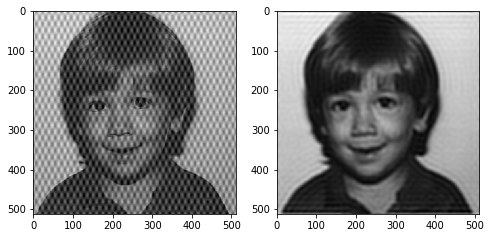

In [21]:
cir= noise_remover2(img)
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 8)
ax1.imshow(img ,cmap=plt.cm.gray)
ax2.imshow(cir ,cmap=plt.cm.gray)
plt.show()

#### ------------------------------------------------------------------------------------------------------------

### Noise removing in Spatial  domain

In [164]:
# after trying 7 x 7 it didn't give noticable result

ava =[[1/49,1/49,1/49,1/49,1/49,1/49,1/49],
      [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
      [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
      [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
      [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
      [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
      [1/49,1/49,1/49,1/49,1/49,1/49,1/49]]

In [6]:
kernel=np.array([[1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100],
                 [1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100],
                 [1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100],
                 [1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100],
                 [1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100],
                 [1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100],
                 [1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100],
                 [1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100],
                 [1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100],
                 [1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100,1/100]])

In [7]:
kernel2=np.array([[1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255],
                 [1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255,1/255]])

In [8]:
# removing noise in time domain 
# for 10 x 10 filter 

def remove_noise (image, kern):
    img2 =np.zeros((image.shape[0],image.shape[1]))
    for i in range(5,image.shape[0]-5):
        for j in range(5,image.shape[1]-5):
            img2[i,j]=np.sum((image[i-5:i+5,j-5:j+5])*kern)
    return img2     

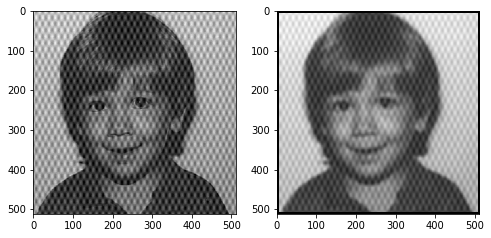

In [9]:
#testing 10 x 10

new2= remove_noise (img, kernel)
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 8)
ax1.imshow(img ,cmap=plt.cm.gray)
ax2.imshow(new2 ,cmap=plt.cm.gray)
plt.show()

In [10]:
# removing noise in time domain 
# for 15 x 15 filter 

def remove_noise2 (image, kern):
    img2 =np.zeros((image.shape[0],image.shape[1]))
    for i in range(7,image.shape[0]-7):
        for j in range(7,image.shape[1]-7):
            img2[i,j]=np.sum((image[i-7:i+8,j-7:j+8])*kern)
    return img2  

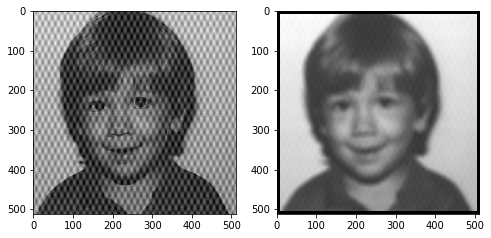

In [30]:
#testing 15 x 15

new3= remove_noise2 (img, kernel2)
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 8)
ax1.imshow(img ,cmap=plt.cm.gray)
ax2.imshow(new3 ,cmap=plt.cm.gray)
plt.show()

## Difference between Spatial and frequency domain noise removing: 
### In frequency domain, the frequencies that cause the noise are removed totally
### In Spatial domain the image bluring reduce the effect of noise in image, but this results in bluring the output image after removing the noise

###### .

###### .

###### .

###### .

# Task 2:
    Write your own function to perform image sharpening on the same image supplied in Task 1. However, you will need to remove  noise first before applying image sharpening.
    Your script should apply the following steps:
    1) Apply smoothing first to produce a denoised image.
    2) Apply any edge detection filter (Implementation of Laplace for example) to generate edges to produce an edge image.
    3) Add the edge image to the original image to produce a sharpened image.


# <font color=darkred size=4>2-Solution

#### Use noise remover function in frequency domin as a smoother 

In [53]:
# kernals for edge detection

laplace_kernel= np.array([[ -1,  -1, -1],
                         [ -1,  8,  -1],
                          [-1, -1, -1]])

sobel_vertical_edge_kernel = np.array([[ -1,  0,  1],
                                   [ -2,  0,  2],
                                    [-1, 0, 1]])

sobel_horizontal_edge_kernel = np.array([[ 1,  2,  1],
                                   [ 0,  0,  0],
                                   [-1, -2, -1]])


In [14]:
 # edge detection function 
    
def edge_detection (image, kern):
    img2 =np.zeros((image.shape[0],image.shape[1]))
    for i in range(2,image.shape[0]-1):
        for j in range(2,image.shape[1]-1):
            img2[i,j]=np.sum((image[i-1:i+2,j-1:j+2])*kern)
    return img2 
    

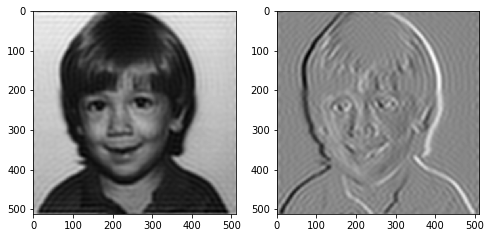

In [59]:
# test edge detection after removing the noise 

im1= noise_remover (img)  # in frequency domain
im2= edge_detection (im1, sobel_vertical_edge_kernel )
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 8)
ax1.imshow( cir ,'gray')
ax2.imshow( im2 ,'gray')
plt.show()

In [17]:
# sharpening image 
# frequency domain noise romoving 

def sharpenning (image, kernal_for_edge_detection):
    img1= np.copy (image)
    img2= noise_remover2 (img1)
    img3= edge_detection (img2, kernal_for_edge_detection)
    return img3+ img2

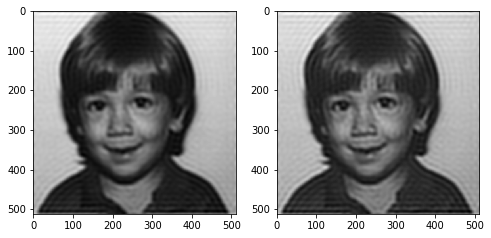

In [60]:
# test sharpening
# using laplace in edge detection
# removing noise in frequency domain

output = sharpenning (img,laplace_kernel )
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 8)
ax1.imshow( cir ,'gray')
ax2.imshow( output ,'gray')
plt.show()

# first image is the image before sharpenning and after removing the noise

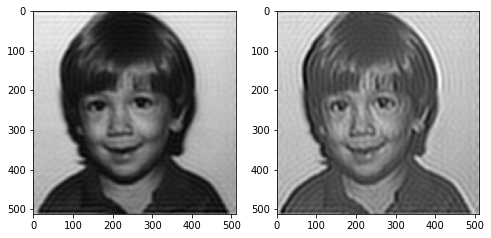

In [54]:
# using vertical sobel in edge detection 
# test sharpening
# removing noise in frequency domain

output2 = sharpenning (img,sobel_vertical_edge_kernel )
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 8)
ax1.imshow( cir ,'gray')
ax2.imshow( output2 ,'gray')
plt.show()

# first image is the image after removing the noise and before sharpenning

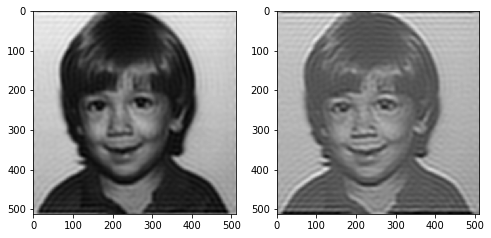

In [55]:
# test sharpening
# removing noise in frequency domain
# using horizontal sobel in edge detection 

output3 = sharpenning (img,sobel_horizontal_edge_kernel )
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 8)
ax1.imshow( cir ,'gray')
ax2.imshow( output3 ,'gray')
plt.show()

# first image is the image before sharpenning and after removing the noise

### ----------------------------------------------------------------------------------------------------------

### using noise removing fuction in spatial domain as a smoother 

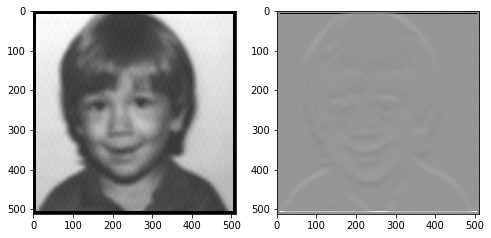

In [56]:
x1= remove_noise2 (img, kernel2)  # in spatial domain 15 x 15 avarage filter
x2= edge_detection (x1, sobel_horizontal_edge_kernel )
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 8)
ax1.imshow( x1 ,'gray')
ax2.imshow( x2 ,'gray')
plt.show()

# the image is too blured that the filter could detect edges well

In [38]:
def sharpenning2 (image, kernal_for_edge_detection):
    img1= np.copy (image)
    img2= remove_noise2 (img1,kernel2)  # use avarage filter to smooth the image 15 x 15
    img3= edge_detection (img2, kernal_for_edge_detection)
    return img3+ img2

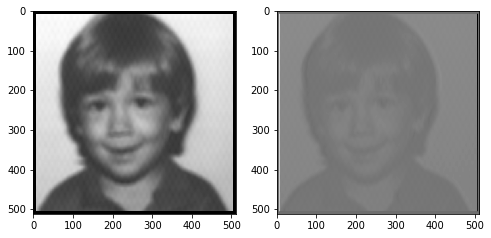

In [57]:
# test sharpening 
# using noise removing function in spatial domain 

out = sharpenning2 (img,sobel_vertical_edge_kernel )
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 8)
ax1.imshow( new3 ,'gray')
ax2.imshow( out ,'gray')
plt.show()

# first image is the image after removing the noise and before sharpenning
# the output image is not good as the edges are not well generated 